In [288]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [289]:
gcamp = Image.open("stroh2013making_waves_fig_s4_A_1.png")

In [290]:
gcamp = np.mean(np.array(gcamp), axis = 2)<180

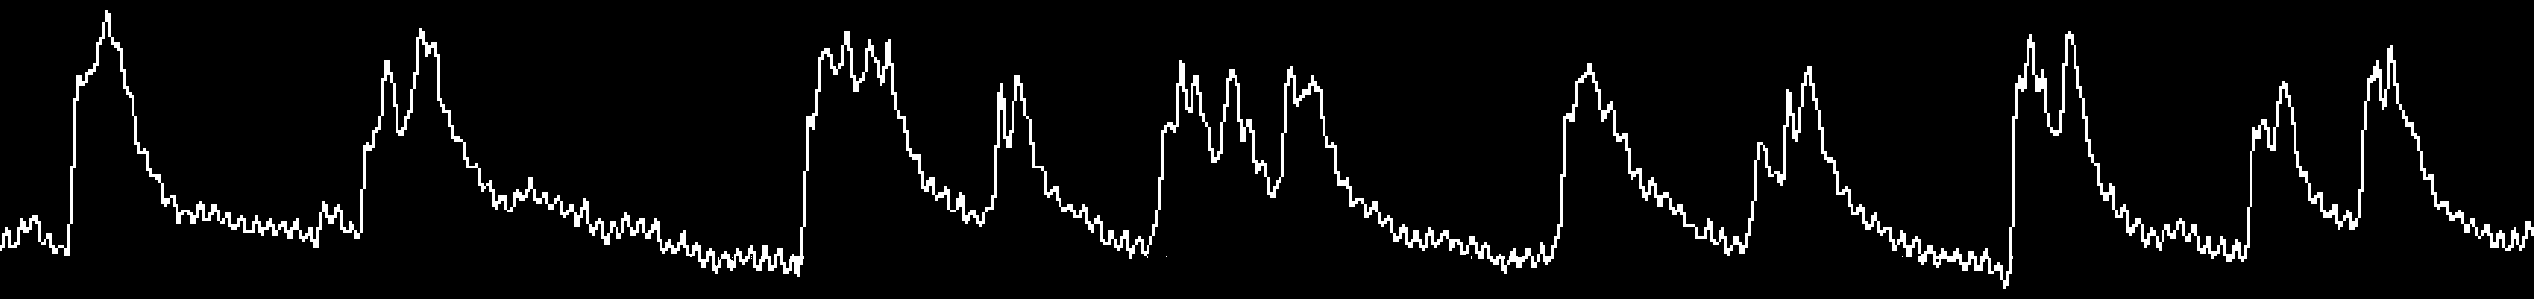

In [291]:
Image.fromarray(gcamp)

In [292]:
gcamp = [-np.mean(np.where(gcamp[:, i])) for i in range(gcamp.shape[1])]

In [293]:
ecog = Image.open("stroh2013making_waves_fig_s4_A_2.png")

In [294]:
ecog = np.mean(np.array(ecog), axis = 2)<180

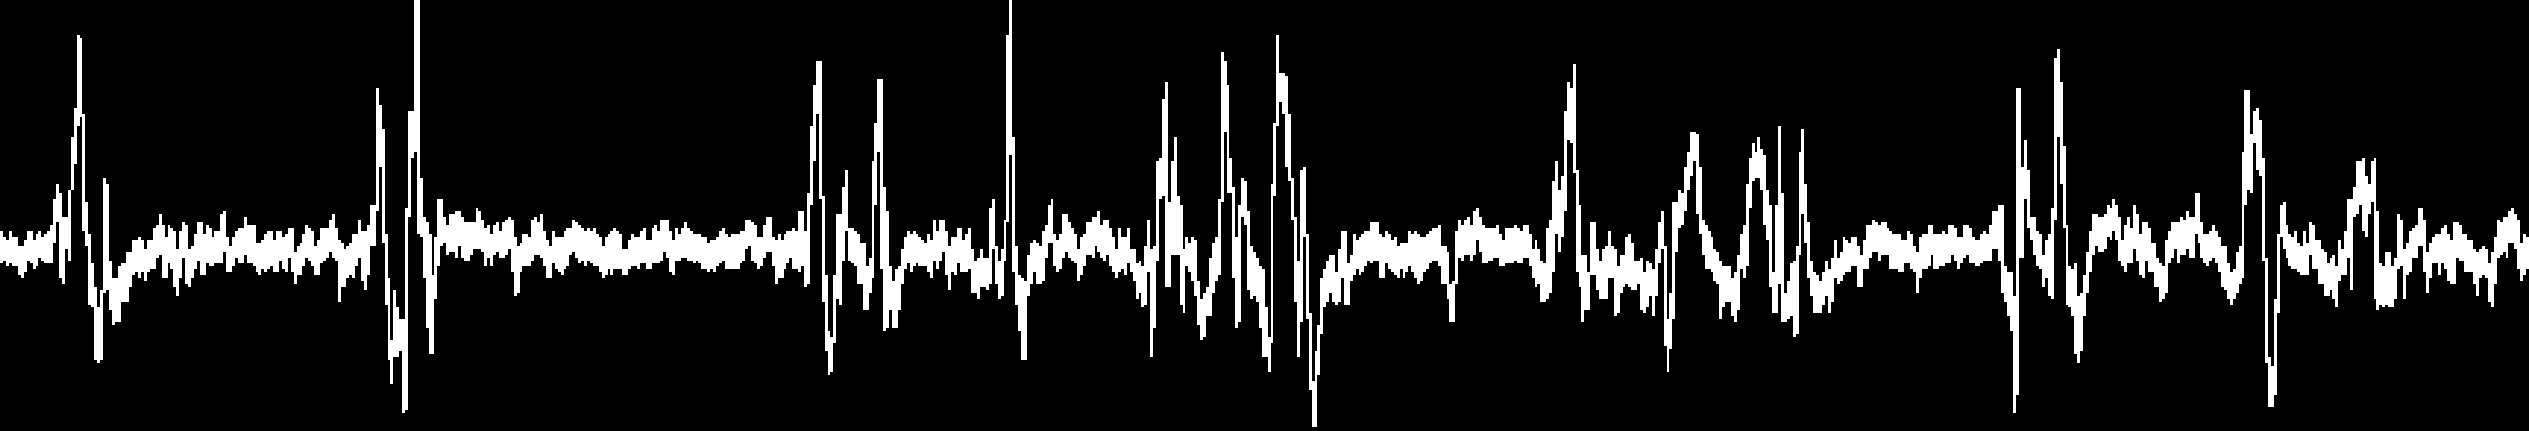

In [295]:
Image.fromarray(ecog)

In [296]:
ecog = [-np.mean(np.where(ecog[:, i])) for i in range(ecog.shape[1])]

In [297]:
def normalize(x):
    x = x - np.nanmin(x)
    x /= np.nanmax(x)
    return x

In [298]:
npix = np.min([len(ecog), len(gcamp)])

In [299]:
ecog = ecog[:npix]
gcamp = gcamp[:npix]

In [300]:
from scipy.ndimage import gaussian_filter

In [301]:
from scipy.spatial import ConvexHull

def rubberband(x, y):
    v = ConvexHull(np.array(list(zip(x, y)))).vertices
    v = np.roll(v, -v.argmin())
    v = v[:v.argmax()]
    return np.interp(x, x[v], y[v])

In [302]:
k = 1
parabola = k*np.linspace(0,40, len(gcamp))**2
convex = gcamp + parabola
gcamp = convex - rubberband(np.arange(len(convex)), convex)

In [323]:
len_in_s = np.round(npix/110,1)

In [324]:
len_in_s

23.0

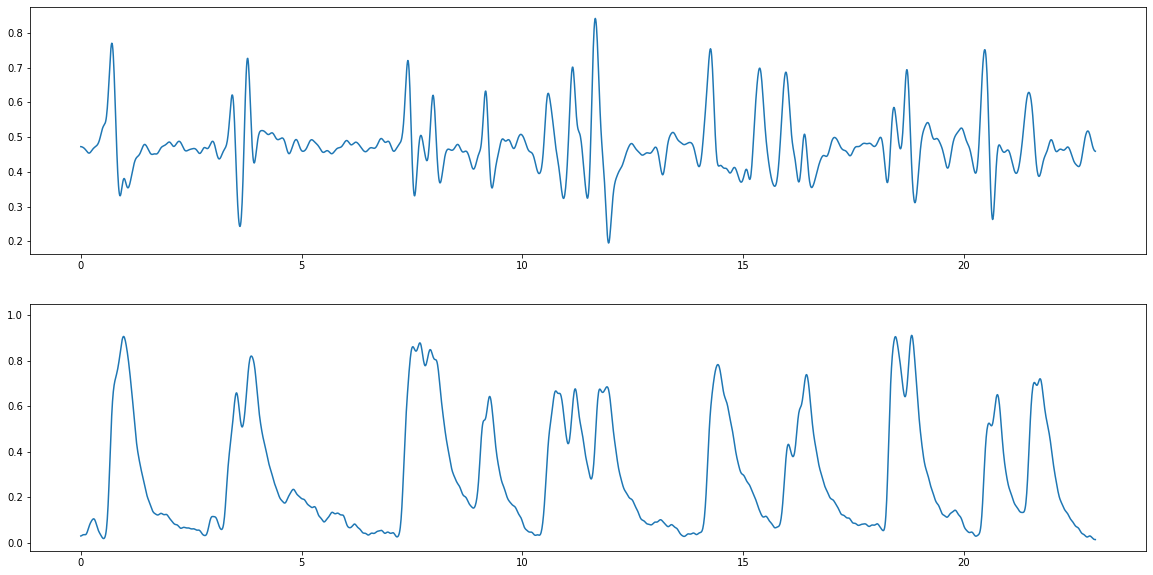

In [330]:
fig, ax = plt.subplots(2, figsize = (20,10))
x = np.arange(npix)
x = x/110
ax[0].plot(x, gaussian_filter(normalize(ecog), 5))
ax[1].plot(x, gaussian_filter(normalize(gcamp), 5), 1)

(0, 3)

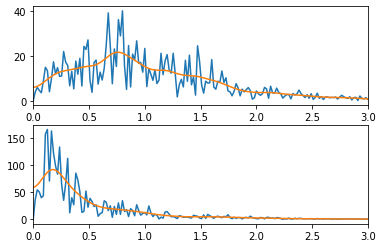

In [341]:
fig, ax = plt.subplots(2)
spec_ecog = np.abs(np.fft.rfft(gaussian_filter(normalize(ecog), 5)))
spec_gcamp = np.abs(np.fft.rfft(gaussian_filter(normalize(gcamp), 5)))

spec_ecog[0] = 0
spec_gcamp[0] = 0
ax[0].plot(np.arange(len(spec_ecog)) * len_in_s/len(spec_ecog),spec_ecog)
ax[0].plot(np.arange(len(spec_ecog)) * len_in_s/len(spec_ecog), gaussian_filter(spec_ecog, 5))

ax[0].set_xlim(0,3)

ax[1].plot(np.arange(len(spec_gcamp)) * len_in_s/len(spec_gcamp),spec_gcamp)
ax[1].plot(np.arange(len(spec_gcamp)) * len_in_s/len(spec_gcamp), gaussian_filter(spec_gcamp, 5))
ax[1].set_xlim(0,3)

Text(0, 0.5, 'frequecny power')

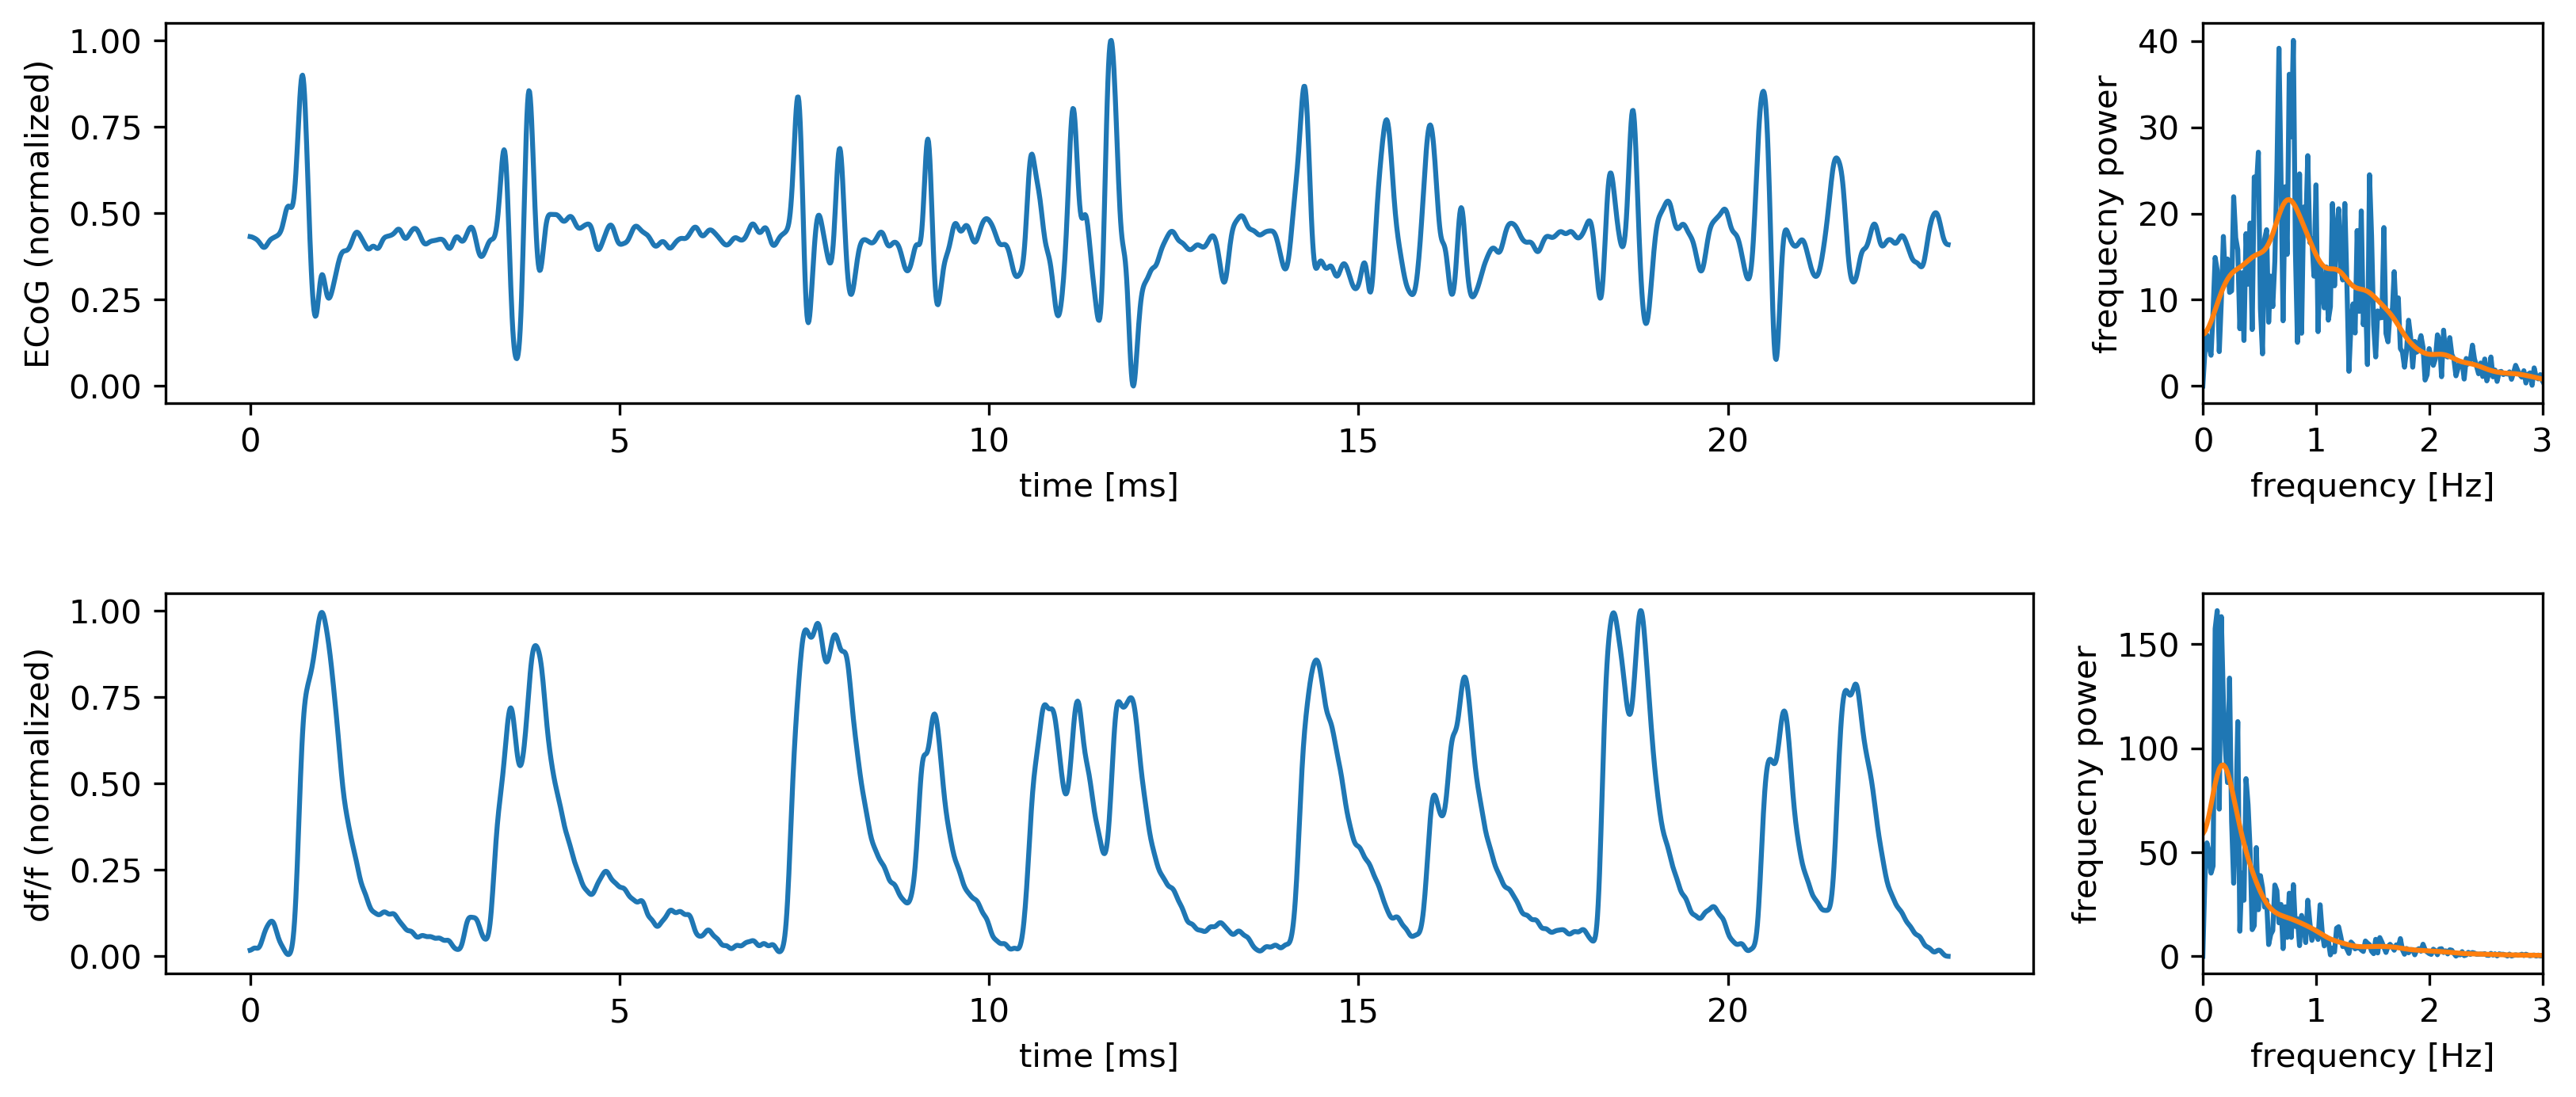

In [371]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (10, 4), dpi = 300)
plt.subplots_adjust(0,0,1,1,.5,.5)
gs = gridspec.GridSpec(nrows = 2, ncols = 5)
ax = []
ax.append(fig.add_subplot(gs[0, :4]))
ax.append(fig.add_subplot(gs[1, :4]))
ax.append(fig.add_subplot(gs[0, 4]))
ax.append(fig.add_subplot(gs[1, 4]))

# Recovered data
x = np.arange(npix)
x = x/110
ax[0].plot(x, normalize(gaussian_filter(normalize(ecog), 5)))
ax[1].plot(x, normalize(gaussian_filter(normalize(gcamp), 5)))

# Fourier plot
spec_ecog = np.abs(np.fft.rfft(gaussian_filter(normalize(ecog), 5)))
spec_gcamp = np.abs(np.fft.rfft(gaussian_filter(normalize(gcamp), 5)))

spec_ecog[0] = 0
spec_gcamp[0] = 0
ax[2].plot(np.arange(len(spec_ecog)) * len_in_s/len(spec_ecog),spec_ecog)
ax[2].plot(np.arange(len(spec_ecog)) * len_in_s/len(spec_ecog), gaussian_filter(spec_ecog, 5))

ax[2].set_xlim(0,3)

ax[3].plot(np.arange(len(spec_gcamp)) * len_in_s/len(spec_gcamp),spec_gcamp)
ax[3].plot(np.arange(len(spec_gcamp)) * len_in_s/len(spec_gcamp), gaussian_filter(spec_gcamp, 5))
ax[3].set_xlim(0,3)

ax[0].set_xlabel("time [ms]")
ax[1].set_xlabel("time [ms]")

ax[0].set_ylabel("ECoG (normalized)")
ax[1].set_ylabel("df/f (normalized)")
ax[2].set_xlabel("frequency [Hz]")
ax[3].set_xlabel("frequency [Hz]")
ax[2].set_ylabel("frequecny power")
ax[3].set_ylabel("frequecny power")